### EDA Project - Boilerplate code
##### TODO : Change Features and Model

### Imports

In [46]:
!pip install seaborn
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import random
import math
from sklearn.ensemble import RandomForestRegressor

### Constants

In [47]:
PATH_TRAIN = "EDA_dataset_train.csv"
PATH_VALID = "EDA_dataset_train.csv"

PATH_PLOTS = "plots"
os.makedirs(PATH_PLOTS, exist_ok=True)

### Read data

In [48]:
data_train = pd.read_csv(PATH_TRAIN)
data_valid = pd.read_csv(PATH_VALID)

# Separate features (X) and target variable (y)
y_train = data_train['Pret']
X_train = data_train.drop('Pret', axis=1)

y_valid = data_valid['Pret']
X_valid = data_valid.drop('Pret', axis=1)

### Features - TODO : play with ths

In [49]:
numeric_features = ["Km", "Vechime", "Capacitate cilindrica", "Putere"]
categorical_features = ["Marca", "Model", "Versiune", "Combustibil", "Transmisie", "Norma de poluare", "Tip Caroserie", "Cutie de viteze", "Stare"]


### Preprocessor

In [50]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Model - TODO : play with this

In [51]:
# Define the regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

regressor = BaggingRegressor(base_estimator=random_forest, n_estimators=100, random_state=42)


### Model Pipeline

In [52]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

### Train

In [53]:
# Train the model
model.fit(X_train, y_train)

C:\Users\Ionut Anghelina\.conda\envs\mlenvtapan\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Km', 'Vechime',
                                                   'Capacitate cilindrica',
                                                   'Putere']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marca', 'Model', 'Versiune',
                                                   'Combustibil', 'Transmisie',
                                                   'Norma de poluare',
                                                   'Tip Caroserie',
                                                   'Cutie de viteze',
                                                   'Stare'])])),
                ('regressor',
                 BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10,
                                                                       random_state=42),
                                  random_state=42))])

### Test on validation

In [54]:
predictions = model.predict(X_valid)

mae = mean_absolute_error(y_valid, predictions)
print("The MAE score of the model on validation data is: " + str(mae))

mse = mean_squared_error(y_valid, predictions)
print("The MSE score of the model on validation data is: " + str(mse))

rmse = mean_squared_error(y_valid, predictions, squared=False)
print("The RMSE score of the model on validation data is: " + str(rmse))

The MAE score of the model on validation data is: 1508.9055070706722
The MSE score of the model on validation data is: 11292232.497035895
The RMSE score of the model on validation data is: 3360.391717796587


### Plots

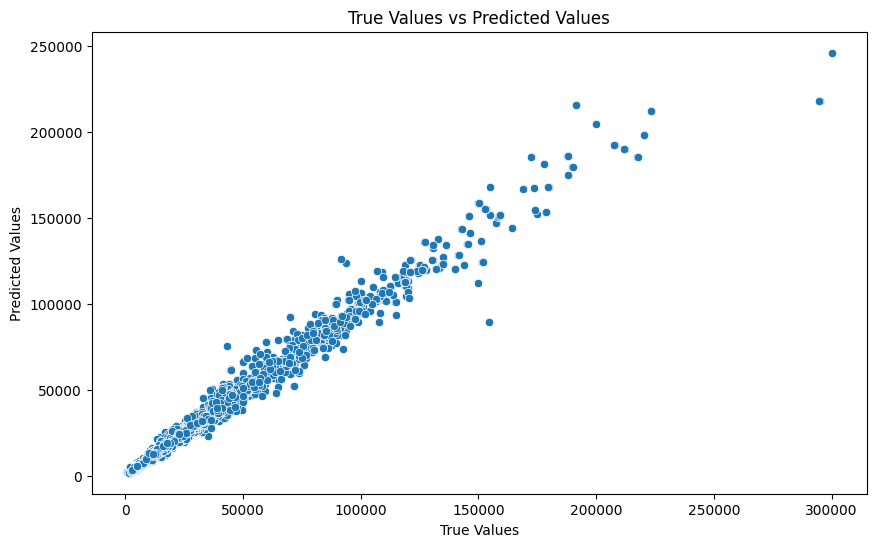

In [55]:
# Create a scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=predictions)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig(os.path.join(PATH_PLOTS, 'True_vs_predicted_plot.png'))
plt.show()

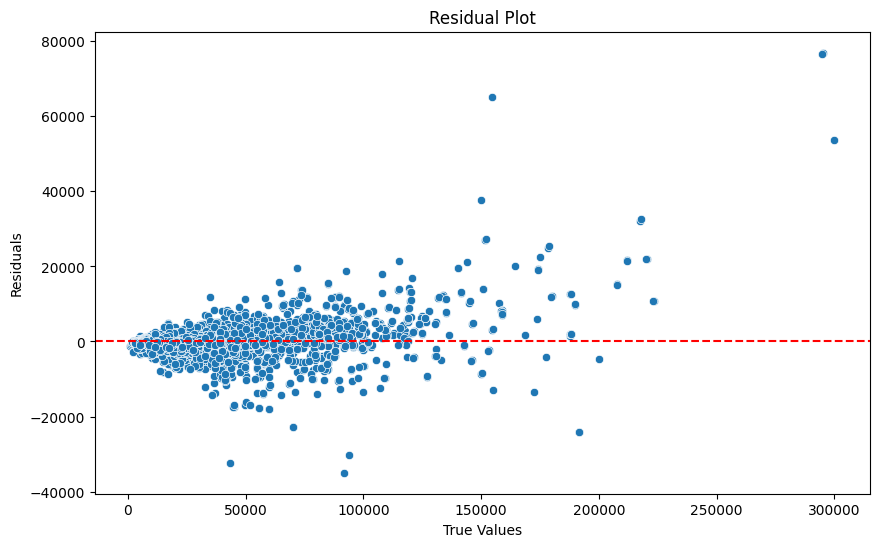

In [56]:
# Create a residual plot to analyze errors
residuals = y_valid - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.savefig(os.path.join(PATH_PLOTS, 'Residual_plot.png'))
plt.show()